In [87]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

In [100]:
#cargar
df <- read.csv(file = '../../../../dataframes/envipe/2016/tmod_vic_envipe2016_09_transform.csv')
#df <- read.csv(file = '../../../../dataframes/envipe/2016/tmod_vic_envipe2016_09_impute.csv')
data <- df
head(data)

BPCOD,BP1_1,BP1_2C,BP1_3C,BP1_4,BP1_5,BP1_6,BP1_20,BP1_23,BP1_30,BP1_33
0.1146469,0.14109271,0.1633246,0.05129323,0.13746004,0.16419645,0.1181343,0.1666667,0.08921825,0.1666667,0.1062191
0.1146469,0.16594013,0.1633246,0.05129323,0.13746004,0.16419645,0.1181343,0.1666667,0.15315315,0.1666667,0.1062191
0.1146469,0.14109271,0.1633246,0.05129323,0.02397559,0.06422552,0.1181343,0.1666667,0.16012787,0.1666667,0.1062191
0.1146469,0.16594013,0.1633246,0.05129323,0.13746004,0.16419645,0.1181343,0.1666667,0.01903516,0.1666667,0.1062191
0.1146469,0.06640511,0.1633246,0.05129323,0.08398721,0.06422552,0.1181343,0.1666667,0.08921825,0.1666667,0.1062191
0.1566405,0.16666667,0.1633246,0.05129323,0.08398721,0.11958733,0.1181343,0.1666667,0.08921825,0.1666667,0.1660854


In [101]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
  entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [102]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
df_entropy

data_names,data_entropy
BPCOD,1.9957242
BP1_1,2.4436606
BP1_2C,0.1088806
BP1_3C,2.6432272
BP1_4,1.3753266
BP1_5,1.4697022
BP1_6,0.6032177
BP1_20,0.3828747
BP1_23,1.7268943
BP1_30,0.2127714


In [103]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
order_df_entropy

,data_names,data_entropy
4,BP1_3C,2.6432272
2,BP1_1,2.4436606
1,BPCOD,1.9957242
9,BP1_23,1.7268943
6,BP1_5,1.4697022
5,BP1_4,1.3753266
11,BP1_33,0.9284591
7,BP1_6,0.6032177
8,BP1_20,0.3828747
10,BP1_30,0.2127714


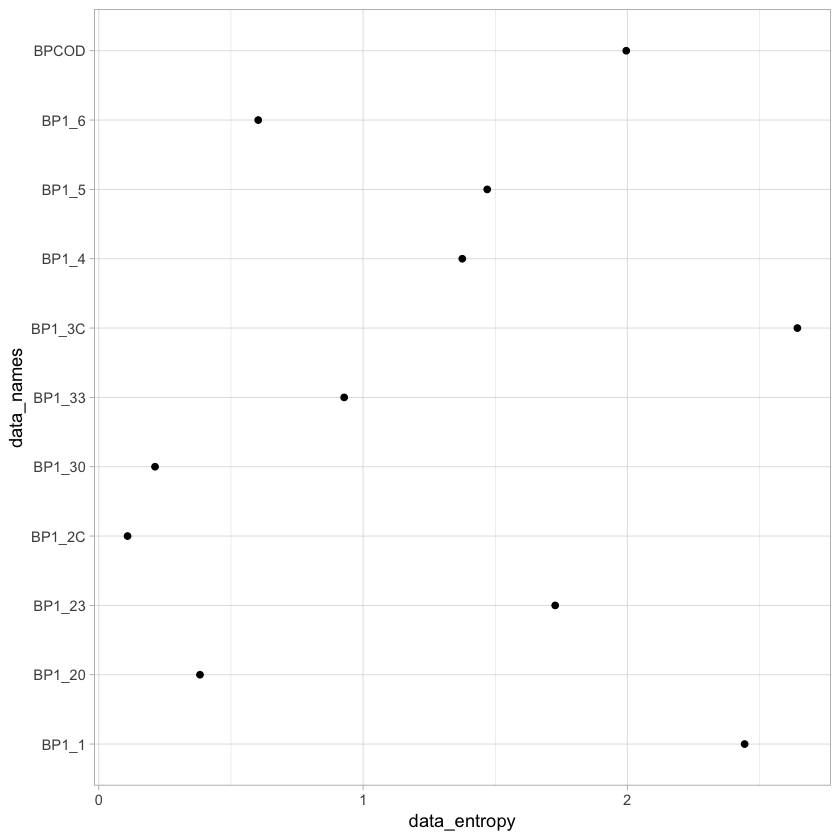

In [104]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

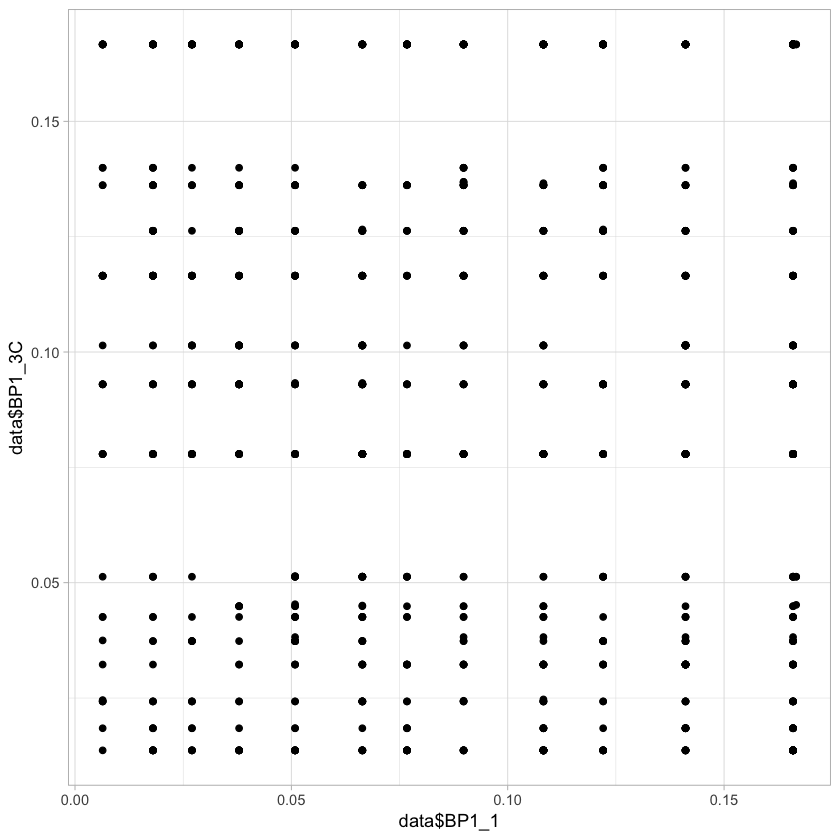

In [105]:
ggplot(data = data, 
       aes(y=data$BP1_3C, 
           x=data$BP1_1)) + geom_point() + theme_light()

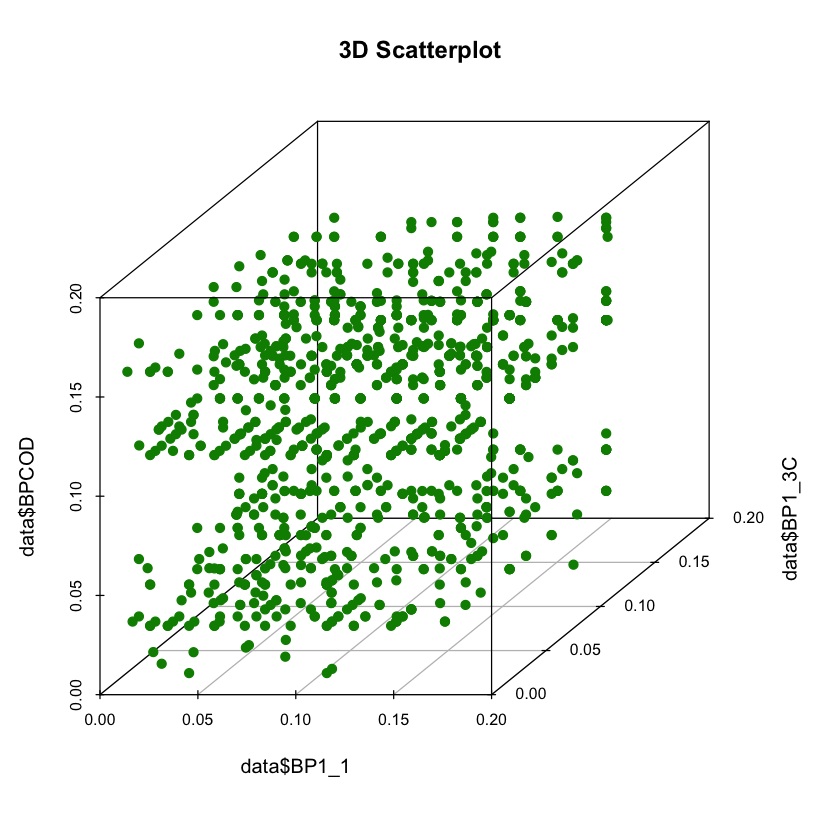

In [106]:
scatterplot3d(y=data$BP1_3C, 
              x=data$BP1_1,
              z=data$BPCOD, pch = 19, color = "green4", main="3D Scatterplot")

In [110]:
write.csv(order_df_entropy, 
          file = '../../../../dataframes/envipe/2016/tmod_vic_envipe2016_09_entropy.csv',
          row.names=FALSE)


In [107]:
data <- as.matrix(data)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    #part = kmeans$cluster, 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

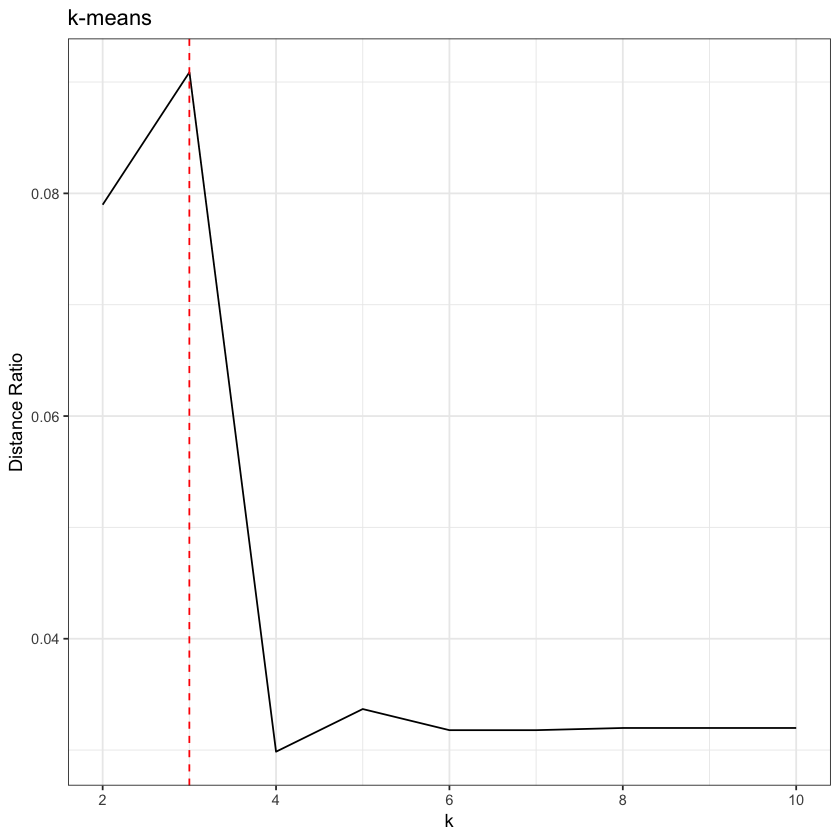

In [108]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

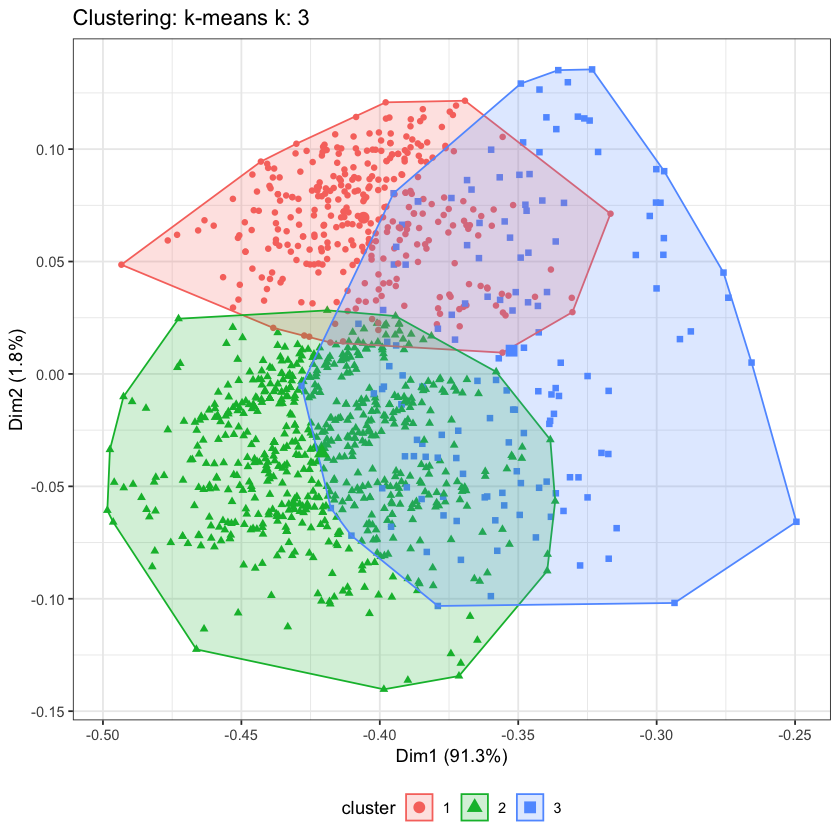

In [109]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans
